# Sales Analysis

#### This project involves:-  
  Task 1:  
  Merging of the 12-months sales reports  
  
  Task 2:
  Data Cleaning  
  
  Task 3:
  Data Exploration.  
  Here, we will answer 5 questions:-  
    1.  Which was the best month in sales and by how much.  
    2.  City with most sales.  
    3.  The best time to maximize on advertisements.  
    4.  Products sold together.  
    5.  Products with most sales.

### Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/salesdata/Sales_Data/Sales_August_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_May_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_February_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_November_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_January_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_March_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_September_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_April_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_July_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_October_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_June_2019.csv
/kaggle/input/salesdata/Sales_Data/Sales_December_2019.csv


### Task #1: Merging 12 months of sales data into a single file

In [2]:
files = [file for file in os.listdir("/kaggle/input/salesdata/Sales_Data")]
all_data = pd.DataFrame()

for file in files:
    df =  pd.read_csv("/kaggle/input/salesdata/Sales_Data/" + file)
    all_data = pd.concat([all_data, df])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


### Task #2: Data Cleaning

In [3]:
# Check some characteristics of the data.
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


We can see that all columns are in string data type. We need to change 'Quantity Ordered', 
'Price Each', and 'Order Date' to correct datatypes. 

In [4]:
# Convert the 'Order Date' column to datetime type
# If you run the commented code below, there is error in row 211. This has resulted due to combining 
# the files with headers. 
#all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
#We need to drop the rows.
all_data.drop(all_data.loc[all_data['Order Date'] == 'Order Date'].index, inplace=True)

#Convert to Datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [5]:
# Sort according to date
all_data = all_data.sort_values(by='Order Date', ascending=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183271 entries, 6344 to 24730
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  object        
 3   Price Each        182735 non-null  object        
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.8+ MB


In [7]:
# Check how many null values in the data
all_data.isnull().sum()

Order ID            536
Product             536
Quantity Ordered    536
Price Each          536
Order Date          536
Purchase Address    536
dtype: int64

In [8]:
# Check which rows are null
all_data[all_data.isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,NaN,NaN,NaN,NaN,NaT,NaN
7154,NaN,NaN,NaN,NaN,NaT,NaN
8507,NaN,NaN,NaN,NaN,NaT,NaN
9161,NaN,NaN,NaN,NaN,NaT,NaN
8514,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaT,NaN
22962,NaN,NaN,NaN,NaN,NaT,NaN
23309,NaN,NaN,NaN,NaN,NaT,NaN
23996,NaN,NaN,NaN,NaN,NaT,NaN


In [9]:
# Drop null values and effect it on the dataset
all_data.dropna(inplace=True)

In [10]:
# Convert 'Quantity Ordered' column to integer and 'Price Each' column to float
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [11]:
# Check resultant dataset
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 6344 to 5103
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


Now the dataset features/columns are in the right data type.

#### Add more columns

In [12]:
# Extract month
all_data['Month'] = all_data['Order Date'].dt.month

In [13]:
# City column
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1])

In [14]:
# State column
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[2][0:3])

In [15]:
# Sales Value
all_data['Sales Value'] = all_data['Quantity Ordered']*all_data['Price Each']

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales Value
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,New York City,NY,11.99
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,San Francisco,CA,11.95
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,New York City,NY,150.00
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,Dallas,TX,2.99
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,Atlanta,GA,23.90


### Task #3: Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month? 

In [17]:
monthly_sales = all_data.groupby(['Month']).agg({'Quantity Ordered':'sum','Sales Value':'sum'}).reset_index()
monthly_sales

,Month,Quantity Ordered,Sales Value
0,1,10670,1786511.29
1,2,13162,2158127.48
2,3,16697,2755969.40
3,4,20226,3336376.42
4,5,18344,3101881.04
5,6,14964,2524464.99
6,7,15781,2587444.91
7,8,13185,2191698.31
8,9,12827,2050361.26
9,10,22356,3679254.16


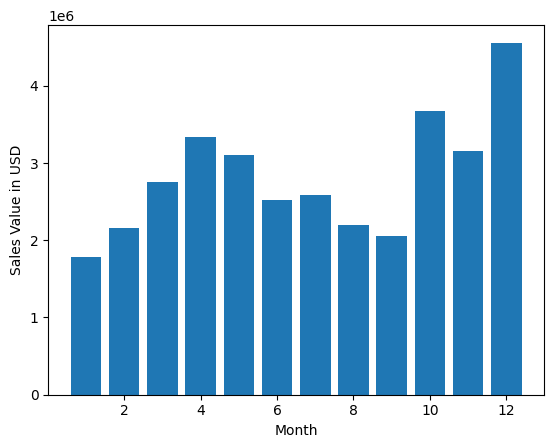

In [18]:
# Plotting Monthly Sales
Months = range(1,13)
plt.bar(Months, monthly_sales['Sales Value'])
plt.xlabel('Month')
plt.ylabel('Sales Value in USD')
plt.show()

December was the Month with most sales with a sales volume of 4.5M U.S Dollars

#### Question 2: What City sold the most products?

In [19]:
city_sales = all_data.groupby('City').agg({'Quantity Ordered':'sum'}).reset_index()
city_sales

,City,Quantity Ordered
0,Atlanta,16304
1,Austin,10933
2,Boston,22123
3,Dallas,16453
4,Los Angeles,32722
5,New York City,27470
6,Portland,13806
7,San Francisco,49363
8,Seattle,16281


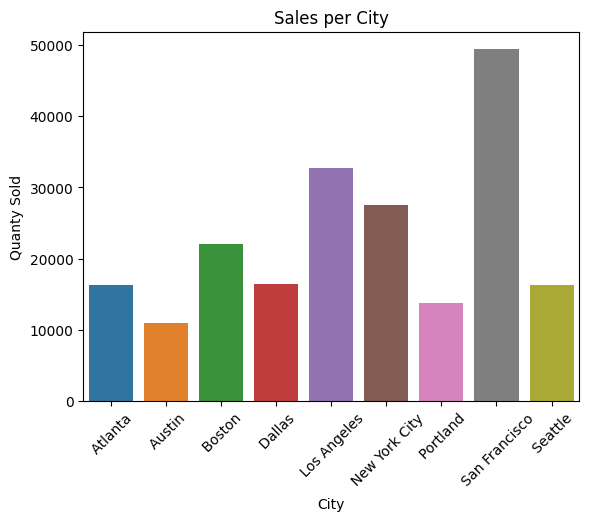

In [20]:
# Plotting Sales by City
sns.barplot(data=city_sales, x=city_sales['City'], y=city_sales['Quantity Ordered'])
plt.xticks(rotation=45)
plt.title('Sales per City')
plt.xlabel('City')
plt.ylabel('Quanty Sold')
plt.show()

Most products were sold in San Francisco with 45K products sold.

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [21]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales Value,Hour
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,New York City,NY,11.99,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,San Francisco,CA,11.95,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,New York City,NY,150.00,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,Dallas,TX,2.99,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,Atlanta,GA,23.90,6


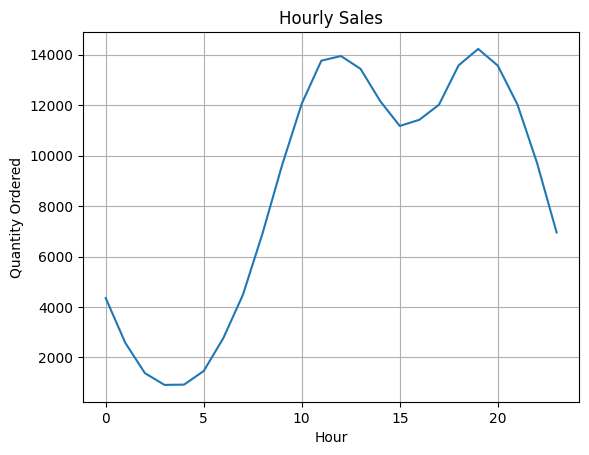

In [22]:
hourly_sales = all_data.groupby('Hour').agg({'Quantity Ordered':'sum'}).reset_index()

sns.lineplot(x=hourly_sales['Hour'],y=hourly_sales['Quantity Ordered'], data=hourly_sales)
plt.title('Hourly Sales')
plt.grid()

From the chart, the best time to do advertisements will be from 11am to 12 noon and 6pm to 8pm.

#### Question 4: Which products are sold together

In [23]:
# Filter the DataFrame into one with duplicate 'Order ID' columns.
duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

# Combine the Products in a duplicate column.
duplicated['Grouped'] = duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicated.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales Value,Hour,Grouped
3763,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,New York City,NY,700.00,7,"iPhone,Wired Headphones"
3764,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,New York City,NY,11.99,7,"iPhone,Wired Headphones"
7189,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,Atlanta,GA,600.00,11,"Google Phone,USB-C Charging Cable"
7190,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,Atlanta,GA,11.95,11,"Google Phone,USB-C Charging Cable"
7576,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,Dallas,TX,700.00,12,"iPhone,Lightning Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...
6628,147535,Google Phone,1,600.00,2019-01-05 04:11:00,"100 Highland St, Boston, MA 02215",1,Boston,MA,600.00,4,"Wired Headphones,Google Phone"
2464,143572,AAA Batteries (4-pack),4,2.99,2019-01-05 08:52:00,"151 10th St, Austin, TX 73301",1,Austin,TX,11.96,8,"AAA Batteries (4-pack),USB-C Charging Cable"
2465,143572,USB-C Charging Cable,1,11.95,2019-01-05 08:52:00,"151 10th St, Austin, TX 73301",1,Austin,TX,11.95,8,"AAA Batteries (4-pack),USB-C Charging Cable"
2085,143211,Apple Airpods Headphones,1,150.00,2019-01-05 11:08:00,"608 Church St, Atlanta, GA 30301",1,Atlanta,GA,150.00,11,"Apple Airpods Headphones,AAA Batteries (4-pack)"


In [24]:
# Drop duplicated rows.
duplicated = duplicated[['Order ID','Grouped']].drop_duplicates()

duplicated.head()

#NB: duplicated[duplicated['Grouped'].str.contains(',')] Helps check if a column contains a certain character(,).

,Order ID,Grouped
3763,144804,"iPhone,Wired Headphones"
7189,148074,"Google Phone,USB-C Charging Cable"
7576,148450,"iPhone,Lightning Charging Cable"
3629,144679,"Google Phone,USB-C Charging Cable"
6537,147451,"Google Phone,Wired Headphones"


In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicated['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 513
('USB-C Charging Cable', 'Google Phone') 510
('Lightning Charging Cable', 'iPhone') 470
('Google Phone', 'USB-C Charging Cable') 456
('Wired Headphones', 'iPhone') 229
('iPhone', 'Wired Headphones') 223
('Google Phone', 'Wired Headphones') 218
('Wired Headphones', 'Google Phone') 192
('iPhone', 'Apple Airpods Headphones') 187
('Vareebadd Phone', 'USB-C Charging Cable') 186


Most products sold together are iPhone and Lightning Charging Cable, Google Phone and USB-C Charging Cable.  
The Company can take adavantage of this and display the products together. As well, once a buyer gets one product,  
the merchandizer can recommend the other product to the customer.

#### Question 5: What products sold the most?

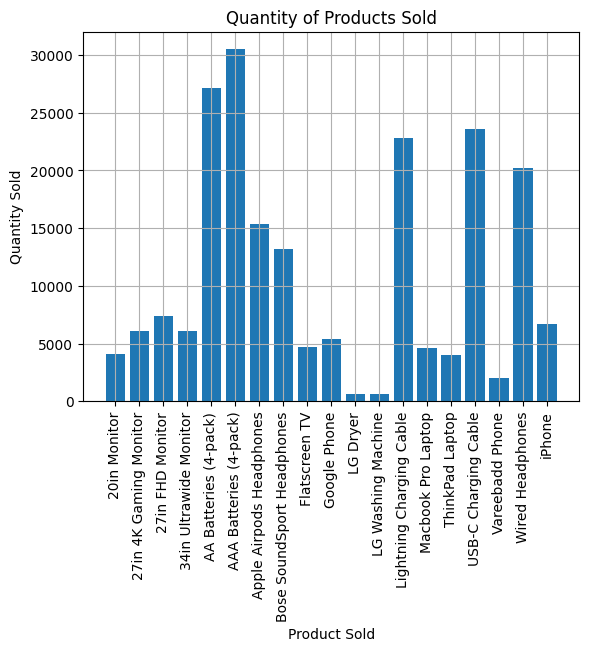

In [26]:
grouped_products = all_data.groupby('Product')
products_sold = all_data.groupby('Product').sum()['Quantity Ordered']
products = [product for product, df in grouped_products]
plt.bar(products, products_sold)
plt.title('Quantity of Products Sold')
plt.xlabel('Product Sold')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

  From the chart, AAA Batteries (4-pack) sold the most while LG Dryer and LG Washing Machine sold the least.
  
  We can base the high quantity sold as result of AAA Batteries having the least price, and we can showcase the 
  hypothesis using the below chart.

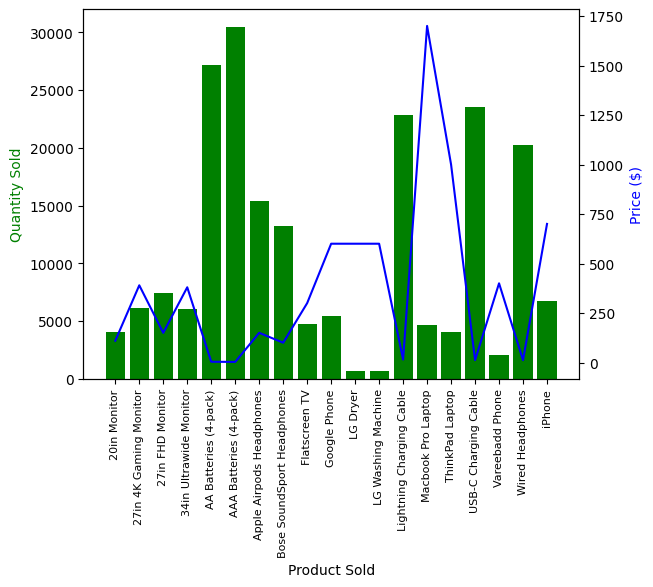

In [27]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, products_sold, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Sold')
ax1.set_ylabel('Quantity Sold', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()